# Intro Seaborn

### Objectives
* Seaborn makes nice plots with concise syntax
* Seaborn (mostly) requires tidy data
* Seaborn integrates directly with Pandas DataFrames
* Must use matplotlib for customized plots
* Sometimes Pandas is the correct choice for plots
* Seaborn plots are usually created with a single line of code
* The primary parameters for Seaborn plotting functions are **x, y, hue, data**
* There are three primary divisions for Seaborn plotting functions
    * Those that produce a distribution - box, violin, hist, KDE
    * Those that group and aggregate the data - bar, count, point
    * Those that plot raw values - scatter, line, heatmaps

### Resources
* [Seaborn home page][1]
* Keep the [Seaborn API page][2] open throughout the notebook

### Introduction

This notebook will dive into the Seaborn visualization library in Python. This notebook assumes no previous visualization knowledge.

Seaborn has a high-level, easy-to-use interface for creating powerful and beautiful visualizations. Seaborn does not actually perform any of the visualizations but instead, calls the primary Python visualization library, matplotlib, to do all the heavy lifting. Sometimes, Seaborn is referred to as a **wrapper** for matplotlib, a library which is more difficult to use but provides more fine-grained control.

The Seaborn documentation is good and fairly concise. You will be well-served to read all of it. The library is fairly minimal and only exposes a relatively few amount of functions.

### Seaborn integration with Pandas
Nearly all Seaborn plotting functions contain a **`data`** parameter that accepts a pandas DataFrame. This allows you to use **strings** of the column names for the function arguments.

### Seaborn and Tidy data
Seaborn plotting functions work best with tidy data. Tidy data makes plotting with seaborn easy. The three tidy principles are:
* Every variable forms a column
* Every row forms an observation
* Each observational unit forms its own table

### The three categories of plots - Distribution plots, Grouping and aggregating plots, and Raw Data plots
I like to segregate Seaborn plotting functions into three categories:
* **Distribution plots** - These are plots that show the distribution of some set of points of a continuous valued variable. Examples of these are box, violin, histogram and KDE plots
* **Grouping and aggregating** - These plots are able to group by some categorical variable and aggregate another. For example, in the employee dataset below, we can use a bar plot to find the average salary by race. Examples of these plots are bar, count, and point plots. Seaborn also allows for aggregation with line plots.
* **Raw data plots** - These are plots that do not do anything to the data other than display it. Some examples are scatter and line plots along with heatmaps.


### The four common Seaborn plotting function parameters - `x`, `y`, `hue`, and `data`
The Seaborn API is easy to use and most of the plotting functions look very similar. They syntax will look like this:

```sns.plotting_func(x='col1', y='col2', hue='col3', data=df)```

You will always pass your DataFrame to the `data` parameter. For univariate plots, you can use exactly one of `x` or `y`. The `hue` parameter adds an extra level of dimensionality by splitting and coloring the data by a third variable. 

## Read in City of Houston Employee Data
We will start with a public dataset produced from the City of Houston. There are about 1650 employees and 7 columns of data. The data is tidy and ready to be immediately visualized with Seaborn.

[1]: http://seaborn.pydata.org/index.html
[2]: http://seaborn.pydata.org/api.html

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
emp = pd.read_csv('data/employee.csv')
emp.head()

,dept,title,race,gender,experience_level,experience,salary
0,Houston Police Department-HPD,POLICE OFFICER,White,Male,Novice,1.8,45279.0
1,Houston Fire Department (HFD),ENGINEER/OPERATOR,White,Male,Veteran,34.8,63166.0
2,Houston Police Department-HPD,SENIOR POLICE OFFICER,Black,Male,Veteran,32.0,66614.0
3,Public Works & Engineering-PWE,ENGINEER,Asian,Male,Novice,4.7,71680.0
4,Houston Airport System (HAS),CARPENTER,White,Male,Novice,3.1,42390.0


In [3]:
emp.shape

(1653, 7)

## The Seaborn API Page
Please open the [Seaborn API][1] if you have not done so already.  I really like the Seaborn API page as it gives a nice overview of the library. The top of the API contains the main categories of plotting functions. These categories are currently:

* Relational
* Categorical
* Distribution
* Regression
* Matrix

These categories contain essentially all the plotting functions in the library. The other sections cover less important topics such as making specific grids and aesthetics. This notebook will only focus on the plots in the above categories.

[1]: http://seaborn.pydata.org/api.html

## Distribution Plots
If you look at the Seaborn API, you'll notice a section on distribution plots. Unfortunately this isn't labeled properly as there are multiple distribution plotting functions found in other categories. The following are the distribution plots:

#### Most common
* boxplot
* violinplot
* distplot

#### Others
* stripplot
* swarmplot
* boxenplot
* jointplot - does both raw data plotting and distribution plots

## Univariate Distribution Plots
Let's begin by plotting the distribution of a single variable. The data that is used for the distribution must be **numeric**.

Let's create a boxplot of the salary. Most Seaborn plotting functions have both `x` and `y` parameters. For these univariate plots, we need to specify just one.

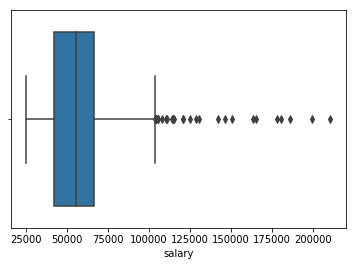

In [4]:
sns.boxplot(x='salary', data=emp)

Make the boxplot vertical by using **`y`**.

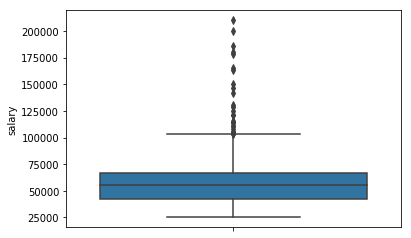

In [5]:
sns.boxplot(y='salary', data=emp)

### Violin plot
Violin plots create estimate the probability distribution of continuous variables by computing the [kernel density estimate (KDE)[1]. The KDE is very similar to a histogram and is essentially a continuous smoothed histogram. The KDE is duplicated and plotted on two sides. I don't particularly like violin plots because they show the exact same data twice.

Below, the distribution of the experience is plotted as a violin plot.

[1]: https://en.wikipedia.org/wiki/Kernel_density_estimation

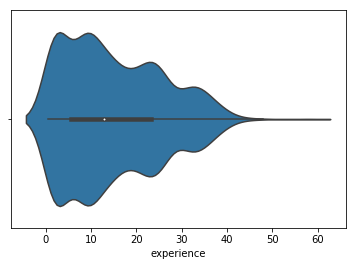

In [6]:
sns.violinplot(x='experience', data=emp)

Again, change its orientation by passing the column name to `y`.

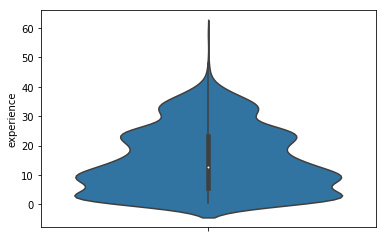

In [7]:
sns.violinplot(y='experience', data=emp)

### KDE and Histograms
Seaborn has a single function, `distplot`, to plot both histograms and the KDE. Unfortunately, this function does not follow the same patterns as the other. There is no `data` parameter. Instead, the first parameter must be either a Pandas Series or a NumPy array of the data you would like to use.

By default, it plots both the histogram and the KDE.

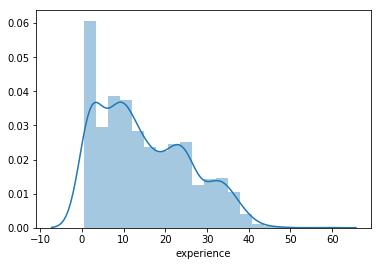

In [8]:
sns.distplot(emp['experience'])

Plot only the KDE. and Notice the similarity to the violin plot.

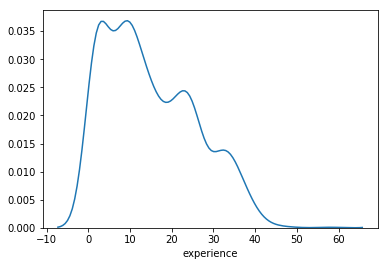

In [9]:
sns.distplot(emp['experience'], hist=False)

Plot horizontally:

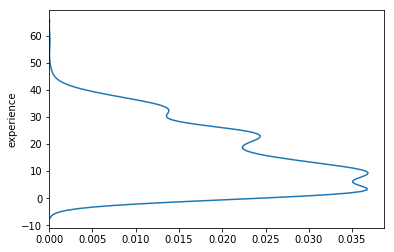

In [10]:
sns.distplot(emp['experience'], hist=False, vertical=True)

Plot just histogram with a specific number of bins.

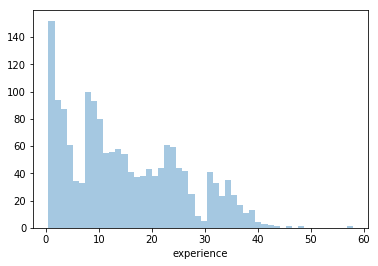

In [11]:
sns.distplot(emp['experience'], bins=50, kde=False)

### Exercise: Explore the other distribution plots
* strip
* swarm
* boxen

## Multivariate Distribution Plots
The above plots are quite simple and take a look at just a single variable. But, what if we were interested in finding a box plot of salary based on the department. This is where Seaborn shines. It is able to split data by unique values in a categorical variable and then make a distribution plot for each category.

### Boxplot of salary by department
With Seaborn, it is quite easy to do this task. We simply use both `x` and `y` parameters.

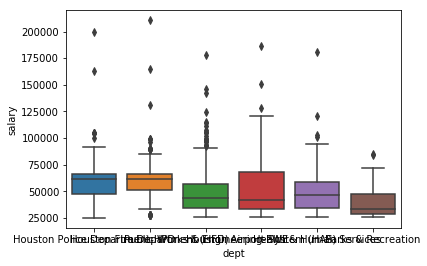

In [12]:
sns.boxplot(x='dept', y='salary', data=emp)

### Changing the size of the figure
Those overlapping x-labels are hideous. Let's change that by enlarging our figure. This is one area where Seaborn fails. We are forced to use Matplotlib. We set the size of the Figure upon creation with the `plt.subplots` function. We can then tell Seaborn to make the plot on the Axes within this Figure with the `ax` parameter.

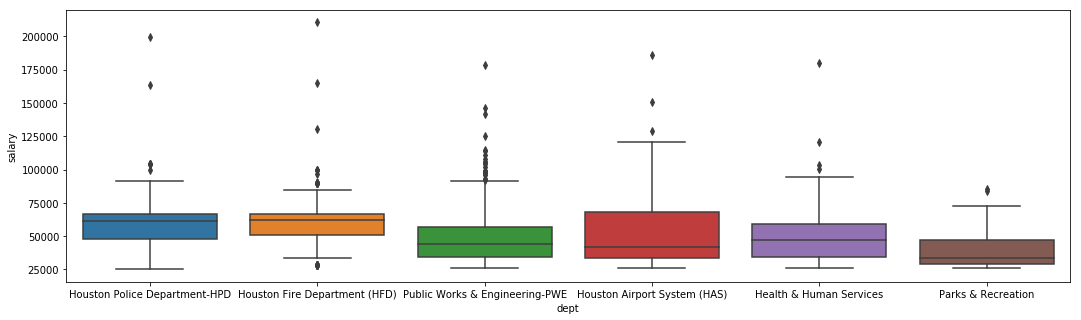

In [13]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='dept', y='salary', data=emp, ax=ax)

### Rotate the tick labels
We can also rotate the tick labels.

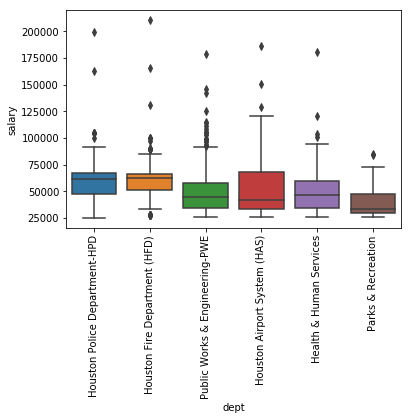

In [14]:
ax = sns.boxplot(x='dept', y='salary', data=emp)
ax.tick_params(axis='x', labelrotation=90)

Make boxes horizontal by switching `x` and `y`.

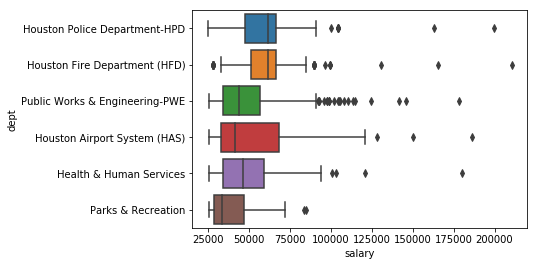

In [15]:
sns.boxplot(x='salary', y='dept', data=emp)

Violin plots are also capable of this.

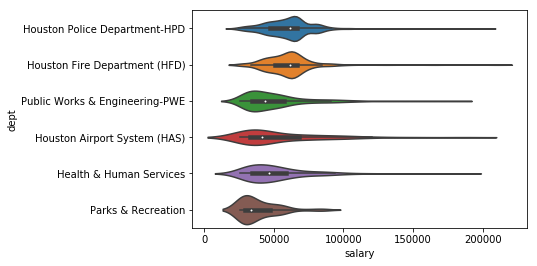

In [16]:
sns.violinplot(x='salary', y='dept', data=emp)

### 2-dimensional KDE
If you have two continuous variables, you can plot a 2-dimensional KDE with `joinplot`. By default, it produces a scatter plot, but you can change this with the `kind` parameter.

The `distplot` function is simple and cannot do this. It only plots one distribution at a time.

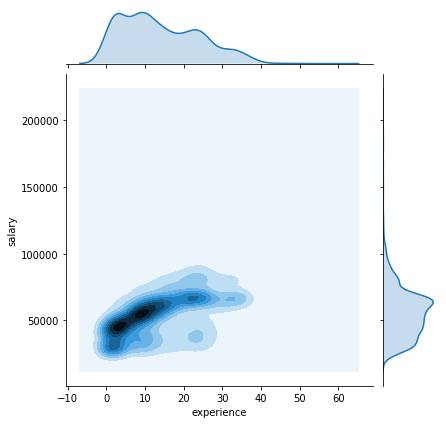

In [17]:
sns.jointplot(x='experience', y='salary', data=emp, kind='kde')

## Adding an extra dimension with `hue`
Another nice feature is the ability to further split your data by another dimension with the `hue` parameter. Let's again create a box plot of salary by department but now within the department make another split by gender.

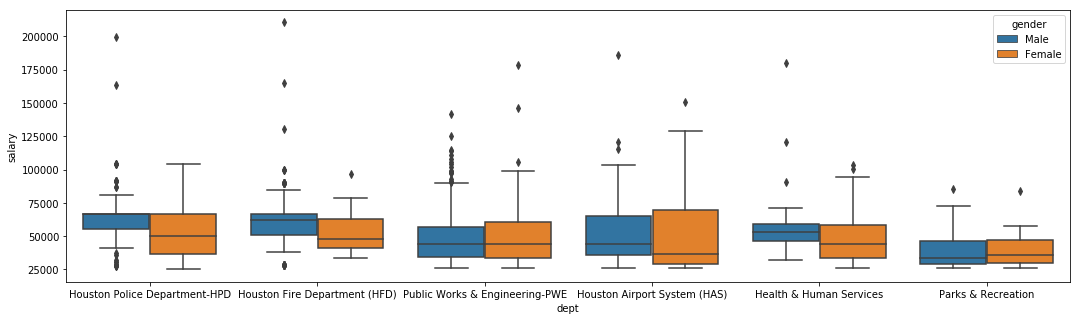

In [18]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='dept', y='salary', data=emp, hue='gender', ax=ax)

We can do the same thing with a violin plot.

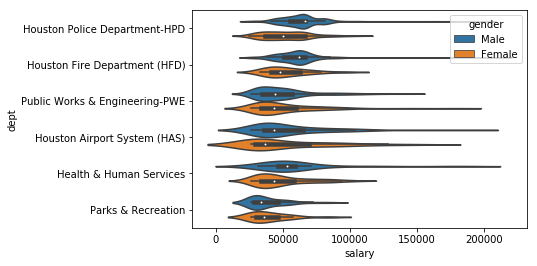

In [19]:
sns.violinplot(x='salary', y='dept', data=emp, hue='gender')

The only real use-case that I have for a violin plot is when there are **exactly two categories** for the `hue` category. You can set the parameter `split` to `True` to make a single violin plot that allows for comparison across the two categories.

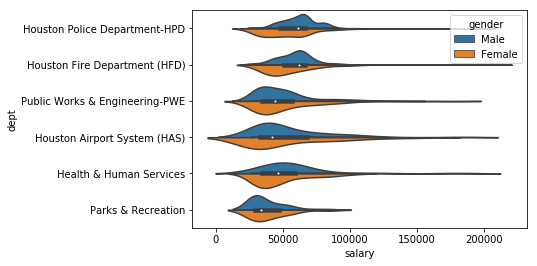

In [20]:
sns.violinplot(x='salary', y='dept', data=emp, hue='gender', split=True)

## Exercise - make multivariate distribution plots with `hue`

# Grouping and Aggregating Plots
Our next category of possible plots are those that group and aggregate. These plots will create a single point statistic for some numeric column of data. The following are the grouping and aggregating plots, all found in the Categorical section of the API:

* barplot
* pointplot
* countplot

### Univariate grouping and aggregating plots - begin with `barplot`
Let's begin again like we did with the distribution plots by using a single variable. Below, we call the `barplot` plotting function, which will create a single bar of the mean salary of the entire employee data.

### The `estimator` parameter
Both the bar and point plots have an `estimator` parameter. This refers to the aggregation function that will be used. You must pass it some function that aggregates values (one that returns a single value). Most of the functions you want will be found in the NumPy library.

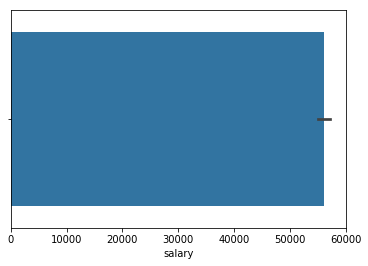

In [21]:
sns.barplot(x='salary', data=emp, estimator=np.mean)

Notice that small black bar. That refers to the confidence interval and defaults to 95%. Use the `ci` parameter to set the interval size or use `None` to remove it.

Let's make a vertical bar plot of the standard deviation of the salary.

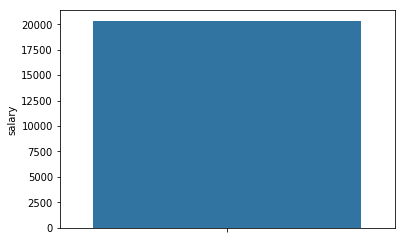

In [22]:
sns.barplot(y='salary', data=emp, estimator=np.std, ci=None)

### Use a `countplot` to count the frequency of values in a column
The `countplot` plotting function is simple and returns the frequency of each unique value in a particular column. You can use it on either categorical or continuous columns, but it is more commonly called on categorical data.

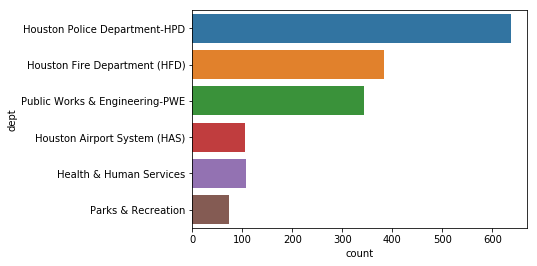

In [23]:
sns.countplot(y='dept', data=emp)

### Grouping by a categorical
Our first bar plot of the overall average salary was not that interesting. We can find the mean salary by department with a `barplot`.

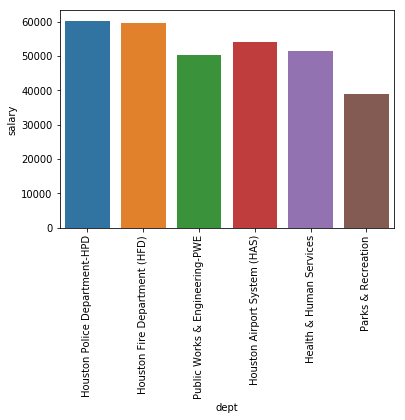

In [24]:
ax = sns.barplot(x='dept', y='salary', data=emp, estimator=np.mean, ci=None)
ax.tick_params(axis='x', rotation=90)

### Using a `pointplot` - very similar to `barplot`
The `pointplot` function works similarly to `barplot` but instead of bars, plots a single point of the aggregated value. It also connects those points together. It is best used whenever there is some order to the categories. Notice, that it does not begin the y axis at 0, so can potentially show misleading information.

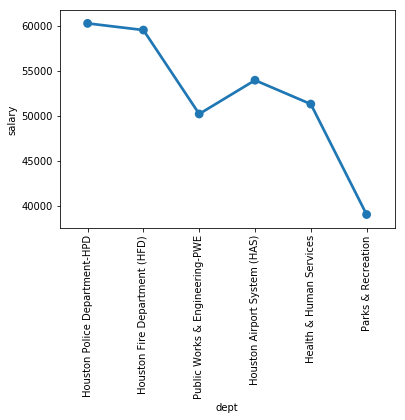

In [25]:
ax = sns.pointplot(x='dept', y='salary', data=emp, estimator=np.mean, ci=None)
ax.tick_params(axis='x', rotation=90)

### Add another dimension with `hue`
As we did with the distribution plots, it is possible to further subdivide our groups with the `hue` parameter. Let's find the average salary by department, by also split the data by gender.

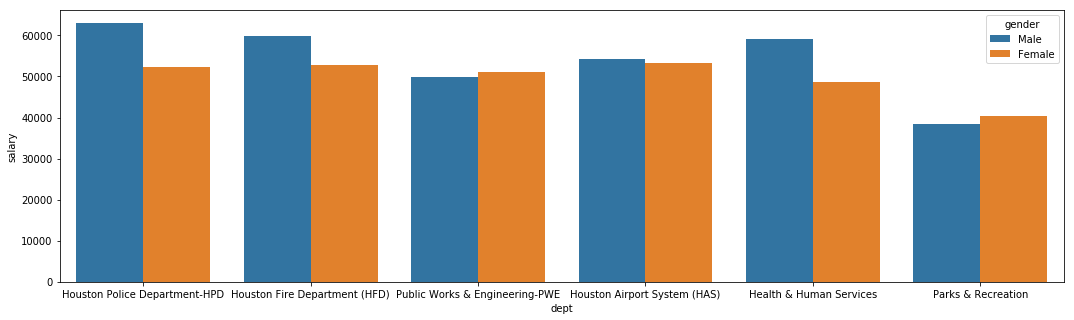

In [26]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='dept', y='salary', data=emp, hue='gender', estimator=np.mean, ci=None, ax=ax)

You are not allowed to pass both `x` and `y` to countplot since the frequency is considered one of the values. You may still use `hue` to split the data into further categories.

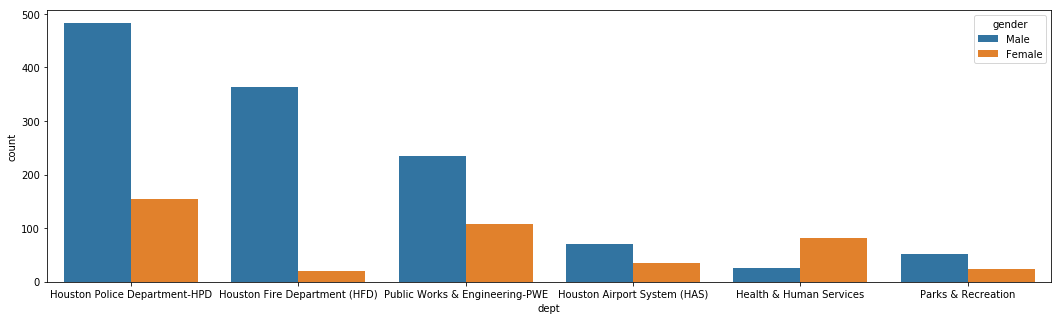

In [27]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x='dept', data=emp, hue='gender', ax=ax)

# Raw Plots
The last major category of plots are those that do not change the underlying data. They simply plot the raw data as it is. Scatter and line plots do just this as well as heatmaps.

### Raw plotting functions
Seaborn has a few raw data plotting functions found in both the Relational and Regression sections of the API
* `scatterplot`
* `lineplot`
* `regplot` - `lmplot` is essentially the same.
* `heatmap` - `clustermap` does heat map plus clustering

### A scatterplot with multiple dimensions
Let's jump straight into a more complex plot. Scatterplots are required to have two numeric variables. Here we use `hue` to color by department and use `style` to make different markers for each gender.

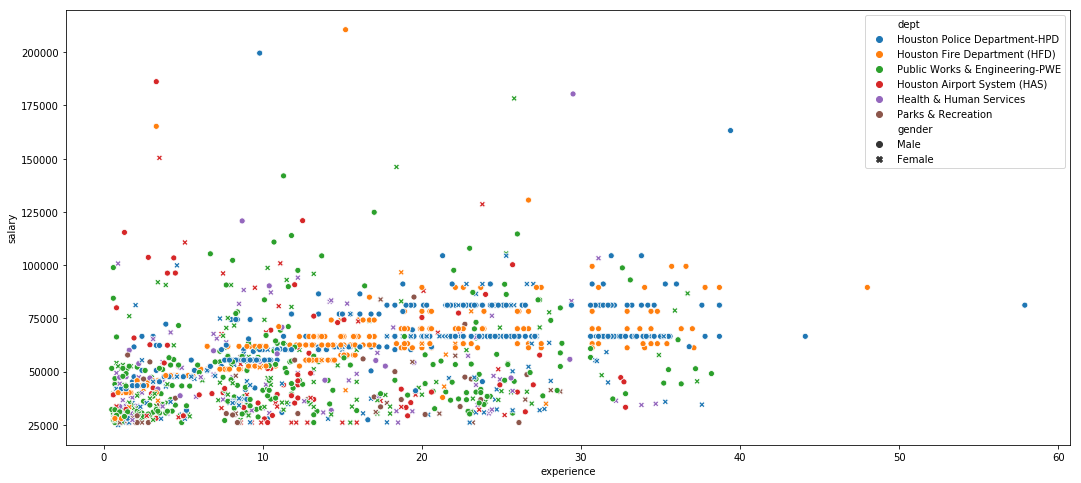

In [28]:
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.scatterplot(x='experience', y='salary', data=emp, hue='dept', style='gender')

### Create a scatter plot with a regresion line with `regplot`
Closely related to `scatterplot` is `regplot` which will draw a regression line with confidence bands through the points.

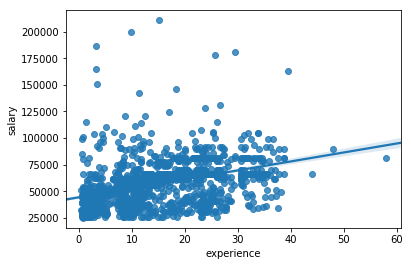

In [29]:
sns.regplot(x='experience', y='salary', data=emp)

### `lmplot` is nearly the same as `regplot`
The `lmplot` function is essentially the same function as `regplot`, but allows us to divide the data into multiple and provide a regression line for each one with the `hue` parameter. We also change the regression type to lowess (a locally-weighted regression)

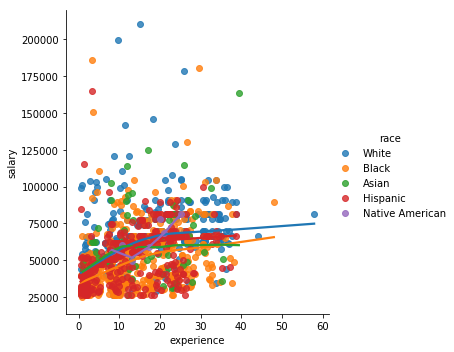

In [30]:
sns.lmplot(x='experience', y='salary', hue='race', data=emp, lowess=True)

## Heat maps
You will likely need to do some pre-processing to your data before using a Seaborn heatmap. One common usecase is to visualize correlations between all the variables in a dataset.

### Housing dataset
Let's read in the housing dataset and calculate the correlation between all the variables.

In [31]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Drop a couple columns.

In [32]:
housing = housing.drop(columns=['Id', 'MSSubClass'])

Calculate correlation with pandas.

In [33]:
corr = housing.corr()
corr.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


Create heatmap.

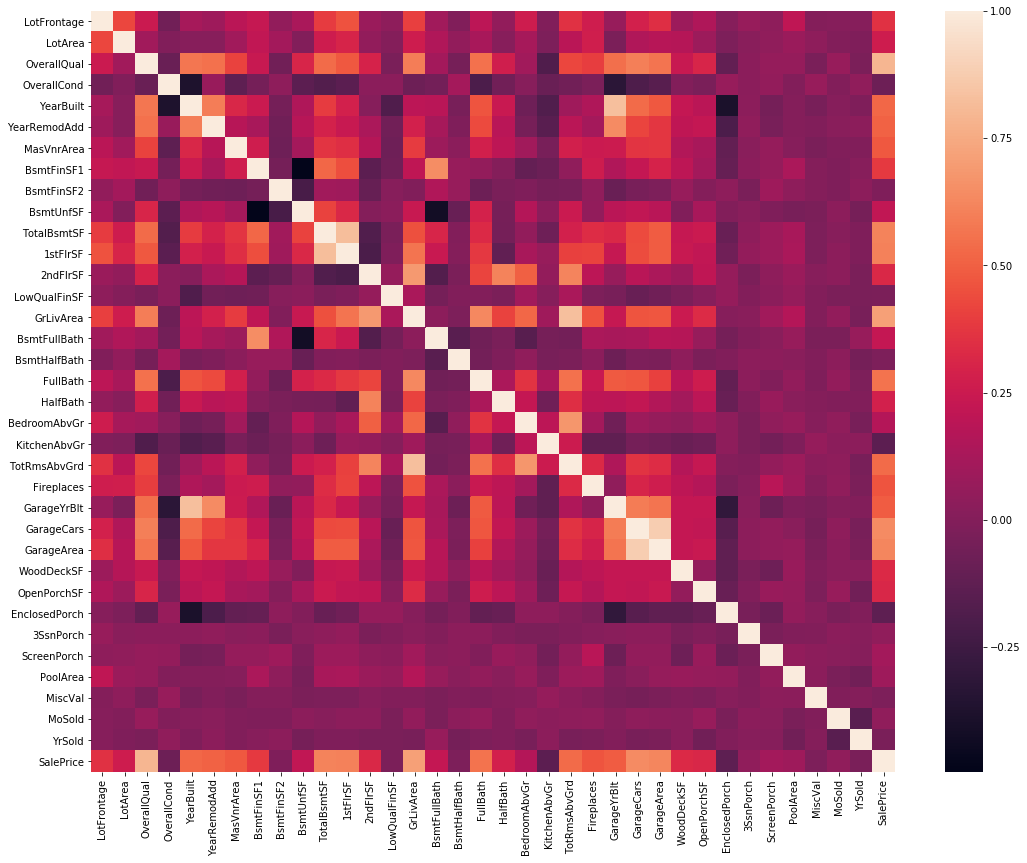

In [34]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(corr, ax=ax)

### Use a clustermap to cluster together similar columns

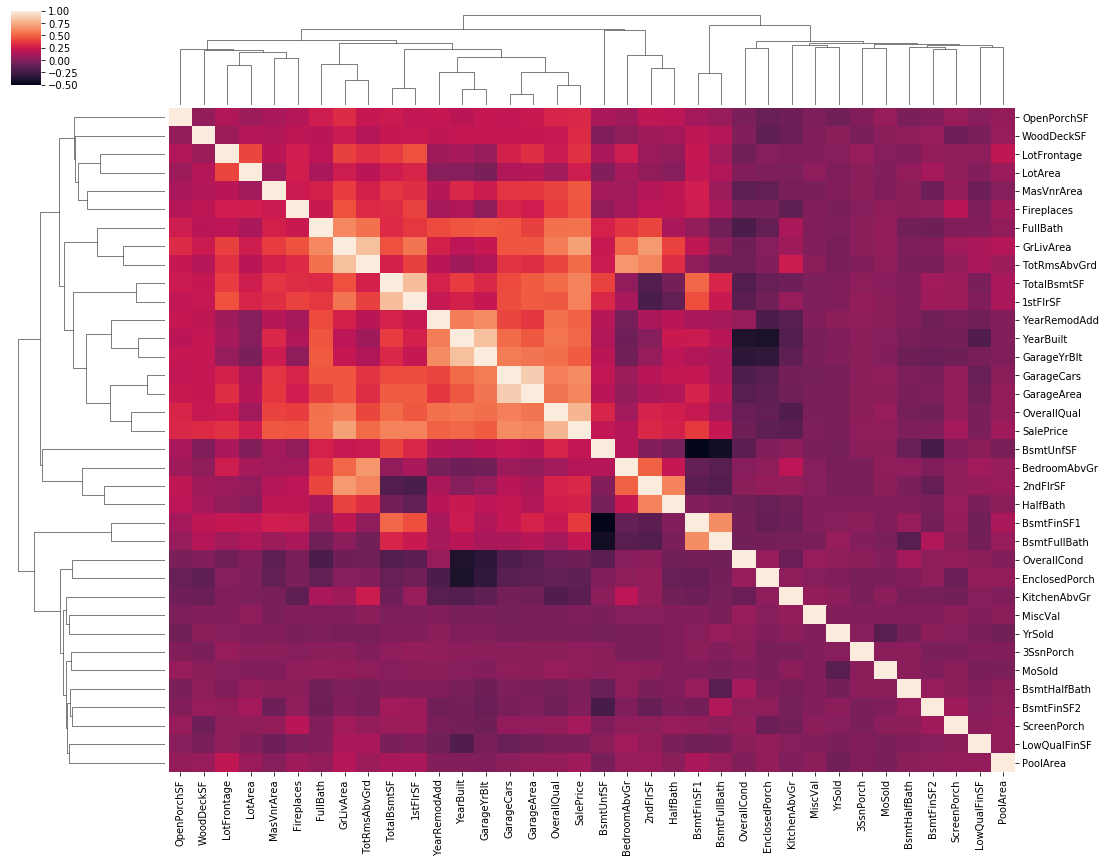

In [35]:
sns.clustermap(corr, figsize=(18, 14))

# Grid Plots - Create Multiple Plots at once
All our Seaborn plotting functions have been used to create single plots thus. Seaborn contains a few plotting functions that are capable of creating multiple plots at once. There are referred to as **Grids**. 

In the Seaborn API, the functions that create grids are the first ones listed in each section

* relplot
* catplot
* lmplot

In the Distribution section, there are a couple functions that create grids in a different manner
* jointplot
* pairplot

## Create grids with `row` and `col` parameters
The functions that create grids use two new parameters to do so: `row` and `col`. You pass them a column name as a string and Seaborn will the split your data by the unique values in this column into entire new plots.

## Grid plots are 'metaplotting functions' - no new types of plots 
The grid plots `relplot`, `catplot`, and `lmplot` do not create any new type of plot. They simply make the other plots in the their respective API section as grids. This is why I like to refer to them as **metaplotting** functions. They are simply calling the other plotting functions once for each unique value of `row` or `col`.

## Use the `kind` parameter to choose the type of plot
Each of the metaplotting functions has a `kind` parameter. Pass it a string to choose the underlying plotting function. Let's see how this works by creating a simple boxplot of salary for each race.

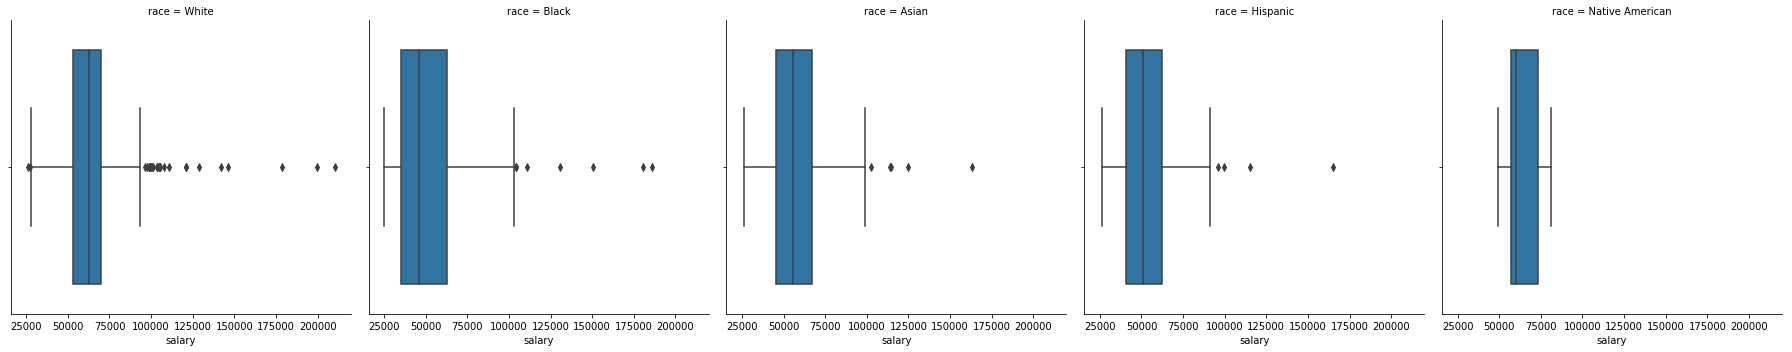

In [36]:
sns.catplot(x='salary', data=emp, kind='box', col='race')

Use the `colwrap` parameter to wrap the plots into a new row.

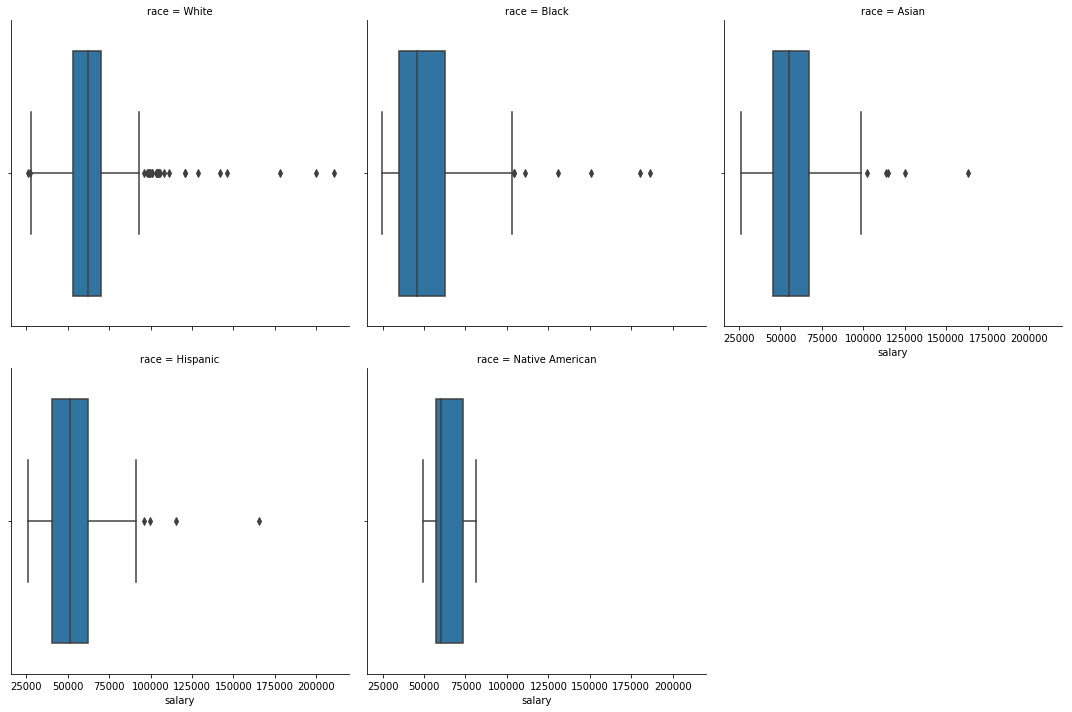

In [37]:
sns.catplot(x='salary', data=emp, kind='box', col='race', col_wrap=3)

A complex plot involving 4 dimensions.

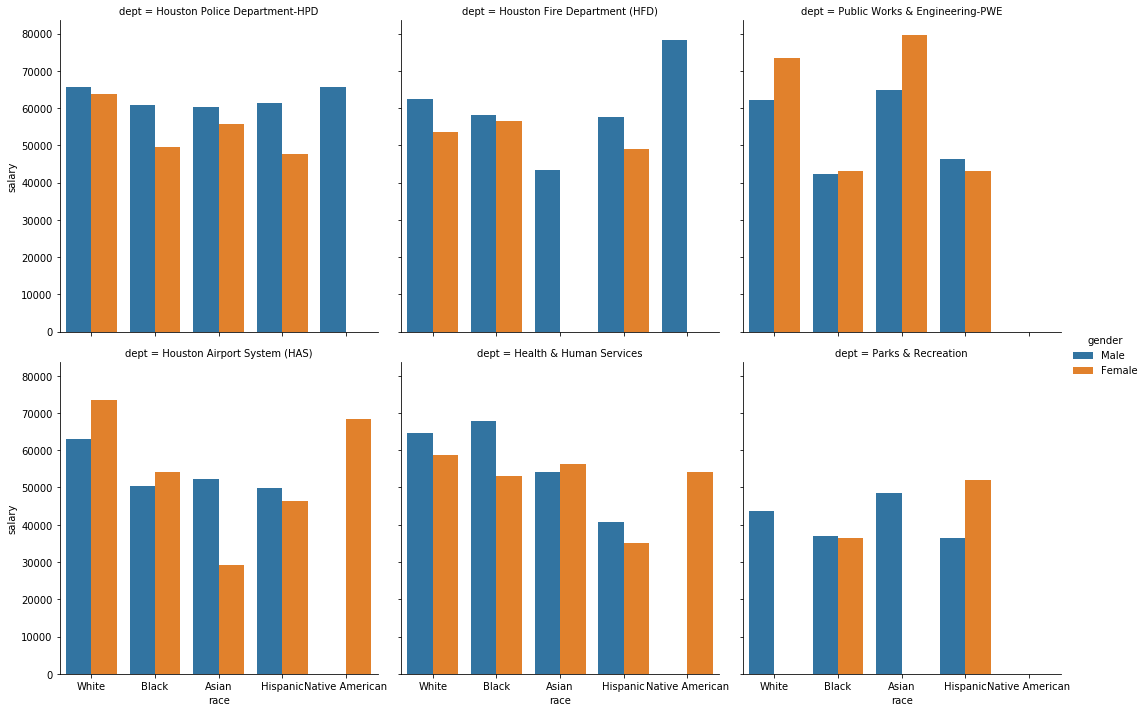

In [38]:
sns.catplot(x='race', y='salary', hue='gender', data=emp, kind='bar', col='dept', col_wrap=3, ci=None)

Use row and col

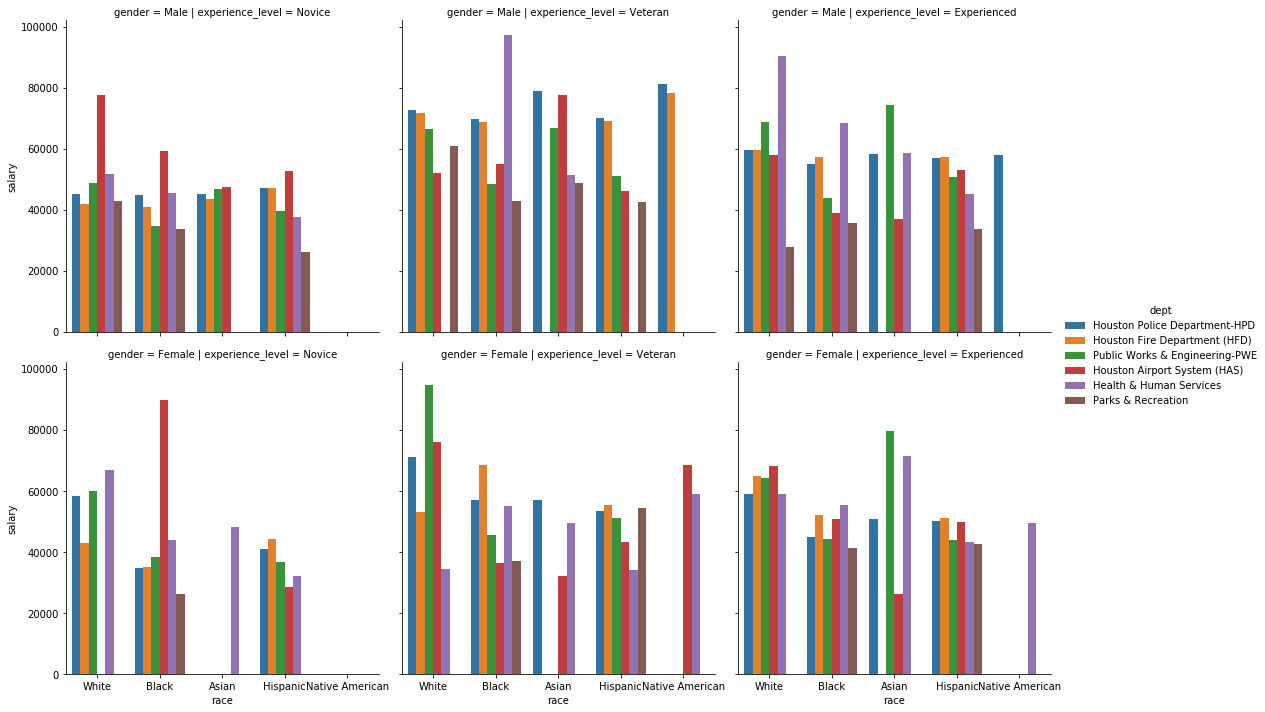

In [39]:
sns.catplot(x='race', y='salary', hue='dept', data=emp, kind='bar', row='gender', col='experience_level', ci=None)

## Do the same with `relplot` and `lmplot` 
* `relplot` is a metaplotting function that does both scatter and line plots
* `lmplot` is a metaplotting function that makes regression plots

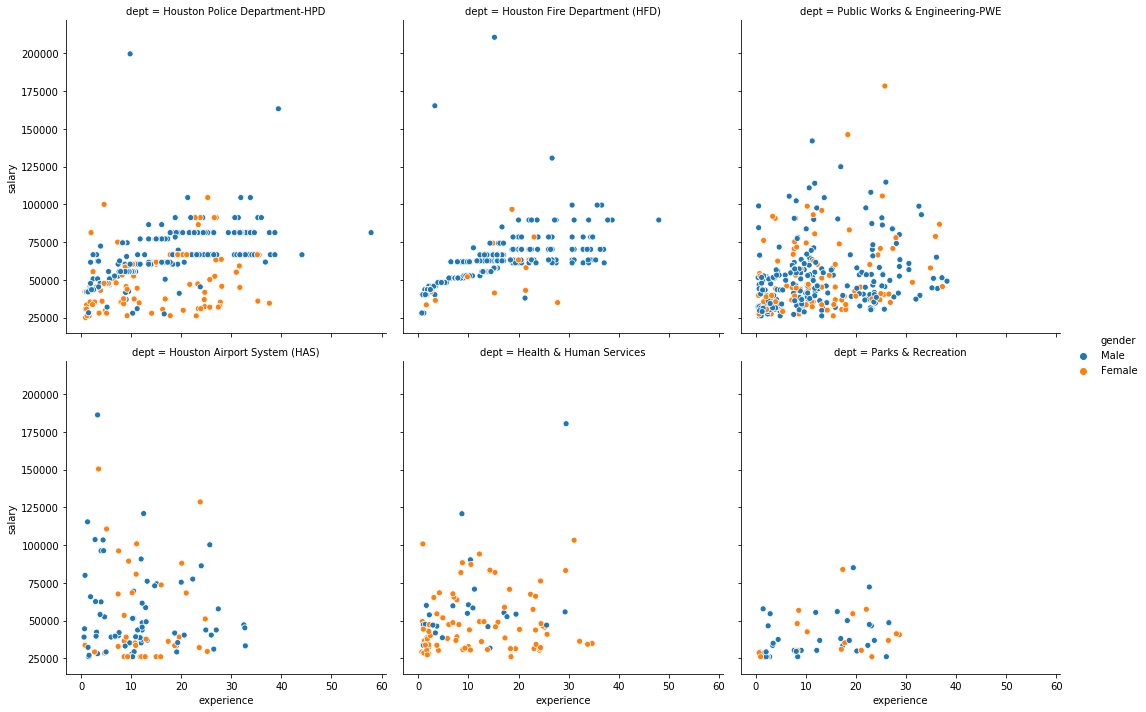

In [40]:
sns.relplot(x='experience', y='salary', data=emp, hue='gender', col='dept', col_wrap=3, kind='scatter')

Don't share the x and y axis limits. Dangerous for making comparisons.

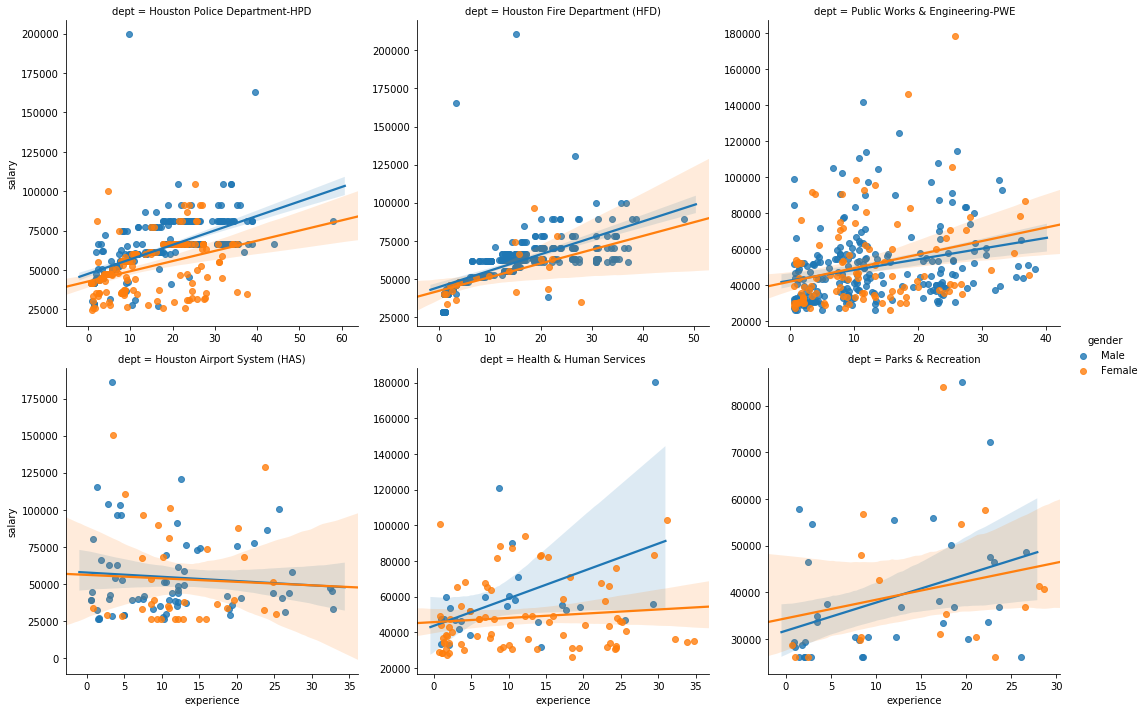

In [41]:
sns.lmplot(x='experience', y='salary', data=emp, hue='gender', 
           col='dept', col_wrap=3, sharex=False, sharey=False)

# Use the diamonds, insurance, or employee datasets to make plots with Seaborn